In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [2]:
digits = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module1/L1/data/digits.csv")

In [10]:
labels = digits['label']
digits = np.array(digits.drop('label', axis=1)).astype('float')
digits.shape, labels.shape

((42000, 784), (42000,))

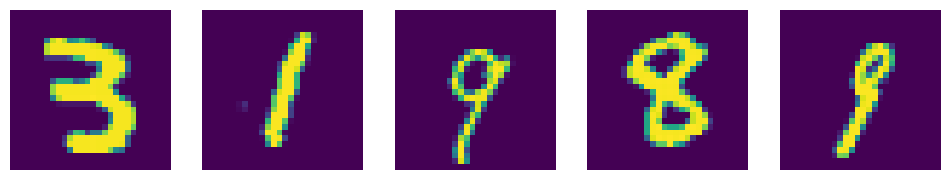

In [11]:
plt.figure(figsize=(12,4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(random.choice(digits).reshape(28,28))
    plt.axis("off")

In [13]:
split=0.7,0.3
#normalize data
digits/=255.0

split_ind = int (len(digits)*split[0])
X_train, X_test, y_train, y_test = digits[:split_ind], digits[split_ind:], labels[:split_ind], labels[split_ind:]
X_train.shape, X_test.shape

((29399, 784), (12601, 784))

In [14]:
model=MLPClassifier().fit(X_train,y_train)
y_pred=model.predict(X_test)
print(f"Using MLPClassifier with the default parameter values gives an accuracy of {accuracy_score(y_pred, y_test)}")

Using MLPClassifier with the default parameter values gives an accuracy of 0.9550035711451472


In [15]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1274
           1       0.98      0.96      0.97      1436
           2       0.96      0.97      0.96      1212
           3       0.93      0.96      0.95      1283
           4       0.95      0.95      0.95      1181
           5       0.94      0.94      0.94      1127
           6       0.98      0.96      0.97      1244
           7       0.97      0.95      0.96      1363
           8       0.94      0.94      0.94      1237
           9       0.92      0.94      0.93      1244

    accuracy                           0.96     12601
   macro avg       0.95      0.95      0.95     12601
weighted avg       0.96      0.96      0.96     12601



In [16]:
parameters = {'hidden_layer_sizes':[50, 100, 200],
              'alpha': [0.001, 0.01, 0.1],
              'max_iter': [200, 500, 800],
              'learning_rate_init':[0.0001, 0.001, 0.01, 0.1]}

model = MLPClassifier()
clf = RandomizedSearchCV(estimator=model, param_distributions=parameters, cv=5)
clf.fit(X_train[:3000], y_train[:3000]) # reduce the train set size to shorten the training time

print("The best parameter values found are:\n")
print(clf.best_params_)

# store the best model found in "bestmodel"
bestmodel = clf.best_estimator_

The best parameter values found are:

{'max_iter': 500, 'learning_rate_init': 0.01, 'hidden_layer_sizes': 200, 'alpha': 0.001}
